In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
weather = pd.read_csv("df_Luzon.csv")

In [3]:
weather.head()

,Unnamed: 0,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,0,RP000098430,"SCIENCE GARDEN, RP",14.633,121.017,46.0,1980-01-01,0.0,78.0,87.0,68.0
1,1,RP000098430,"SCIENCE GARDEN, RP",14.633,121.017,46.0,1980-01-02,0.0,81.0,87.0,67.0
2,2,RP000098430,"SCIENCE GARDEN, RP",14.633,121.017,46.0,1980-01-03,0.0,80.0,82.0,71.0
3,3,RP000098430,"SCIENCE GARDEN, RP",14.633,121.017,46.0,1980-01-04,0.0,82.0,86.0,68.0
4,4,RP000098430,"SCIENCE GARDEN, RP",14.633,121.017,46.0,1980-01-05,0.0,76.0,87.0,65.0


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15384 entries, 0 to 15383
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15384 non-null  int64  
 1   STATION     15384 non-null  object 
 2   NAME        15384 non-null  object 
 3   LATITUDE    15384 non-null  float64
 4   LONGITUDE   15384 non-null  float64
 5   ELEVATION   15384 non-null  float64
 6   DATE        15384 non-null  object 
 7   PRCP        12090 non-null  float64
 8   TAVG        14515 non-null  float64
 9   TMAX        14809 non-null  float64
 10  TMIN        12486 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
weather.describe()

,Unnamed: 0,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,15384.000000,1.538400e+04,1.538400e+04,15384.0,12090.000000,14515.000000,14809.000000,12486.000000
mean,7691.500000,1.463300e+01,1.210170e+02,46.0,0.321648,81.616121,89.931123,73.514897
std,4441.122606,3.552829e-15,4.263395e-14,0.0,0.815835,3.142531,4.007419,3.423548
min,0.000000,1.463300e+01,1.210170e+02,46.0,0.000000,68.000000,73.000000,54.000000
25%,3845.750000,1.463300e+01,1.210170e+02,46.0,0.000000,80.000000,88.000000,72.000000
50%,7691.500000,1.463300e+01,1.210170e+02,46.0,0.000000,81.000000,90.000000,74.000000
75%,11537.250000,1.463300e+01,1.210170e+02,46.0,0.260000,84.000000,92.000000,76.000000
max,15383.000000,1.463300e+01,1.210170e+02,46.0,17.910000,94.000000,103.000000,83.000000


In [6]:
weather.apply(pd.isnull).sum() / weather.shape[0] * 100

Unnamed: 0     0.000000
STATION        0.000000
NAME           0.000000
LATITUDE       0.000000
LONGITUDE      0.000000
ELEVATION      0.000000
DATE           0.000000
PRCP          21.411856
TAVG           5.648726
TMAX           3.737650
TMIN          18.837754
dtype: float64

In [7]:
weather = weather[['DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]

In [8]:
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1980-01-01,0.0,78.0,87.0,68.0
1,1980-01-02,0.0,81.0,87.0,67.0
2,1980-01-03,0.0,80.0,82.0,71.0
3,1980-01-04,0.0,82.0,86.0,68.0
4,1980-01-05,0.0,76.0,87.0,65.0
...,...,...,...,...,...
15379,2023-07-10,NaN,84.0,93.0,77.0
15380,2023-07-11,NaN,84.0,93.0,77.0
15381,2023-07-12,NaN,83.0,92.0,NaN
15382,2023-07-13,NaN,77.0,NaN,NaN


PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)

SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)

TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file)

TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file)

## Data Cleaning

### Converting DATE from object to date time

In [9]:
# Convert the 'date_column' to datetime
weather['DATE'] = pd.to_datetime(weather['DATE'])

<ipython-input-9-6fda2a639fd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['DATE'] = pd.to_datetime(weather['DATE'])


In [10]:
weather.set_index('DATE', inplace=True)

### Replacing the PRCP null with 0

In [11]:
weather["PRCP"].value_counts()

0.00    6516
0.04     505
0.08     350
0.12     246
0.20     197
        ... 
7.09       1
3.44       1
4.11       1
5.83       1
3.04       1
Name: PRCP, Length: 399, dtype: int64

In [12]:
weather["PRCP"] = weather["PRCP"].fillna(0)

<ipython-input-12-36b3b5054f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather["PRCP"] = weather["PRCP"].fillna(0)


### filling the TMAX & TMIN cols

In [13]:
weather['TMIN'] = weather['TMIN'].fillna(weather['TAVG'] - (weather['TMAX'] - weather['TAVG']))
weather['TMAX'] = weather['TMAX'].fillna(weather['TAVG'] + (weather['TAVG'] - weather['TMIN']))

weather.apply(pd.isnull).sum() / weather.shape[0] * 100

<ipython-input-13-785bdee737fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['TMIN'] = weather['TMIN'].fillna(weather['TAVG'] - (weather['TMAX'] - weather['TAVG']))
<ipython-input-13-785bdee737fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['TMAX'] = weather['TMAX'].fillna(weather['TAVG'] + (weather['TAVG'] - weather['TMIN']))


PRCP    0.000000
TAVG    5.648726
TMAX    1.495060
TMIN    1.495060
dtype: float64

In [14]:
weather = weather.interpolate()

In [15]:
weather["TAVG"] = (weather["TMIN"] - 32) / (9/5)
weather["TMAX"] = (weather["TMAX"] - 32) / (9/5)
weather["TMIN"] = (weather["TMIN"] - 32) / (9/5)

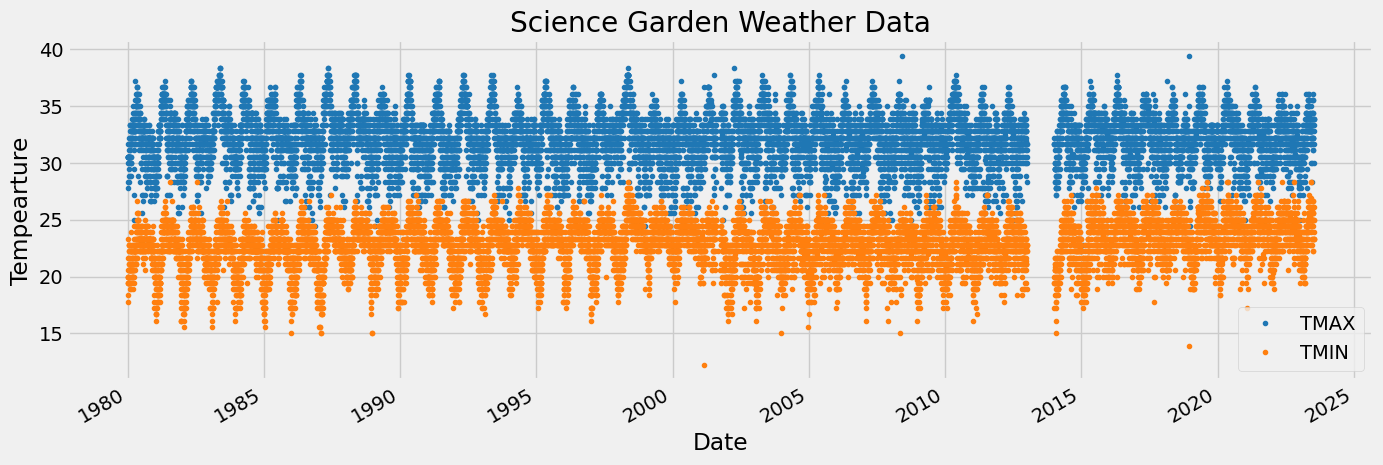

In [16]:
weather[["TMAX", "TMIN"]].plot(style = ".",
        figsize = (15,5),
        color = color_pal,
        title = "Science Garden Weather Data")
plt.ylabel("Tempearture")
plt.xlabel("Date")
plt.legend()
plt.show()

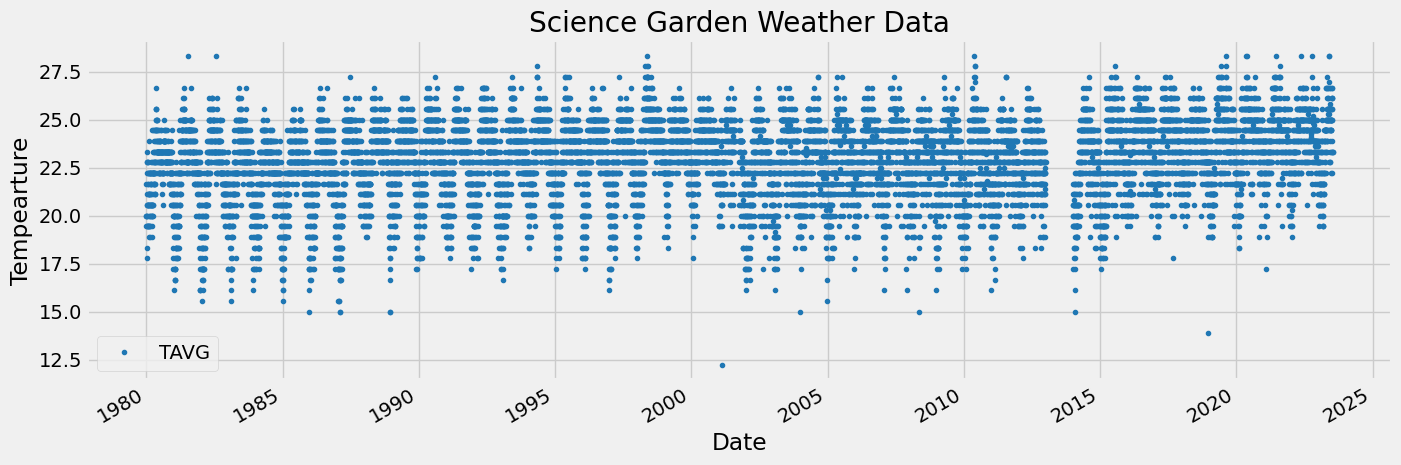

In [17]:
weather["TAVG"].plot(style = ".",
        figsize = (15,5),
        color = color_pal,
        title = "Science Garden Weather Data")
plt.ylabel("Tempearture")
plt.xlabel("Date")
plt.legend()
plt.show()

### Feature Engineering

In [18]:
def create_features(df):
    """
    Create time series features based on time series index

    """
    df = df.copy()
    df["dayofweek"] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["monthly_avg"] = df.groupby(df.index.month)["TAVG"].expanding().mean().reset_index(0, drop=True)
    df["day_of_year_avg"] = df.groupby(df.index.day_of_year)["TAVG"].expanding().mean().reset_index(0, drop=True)


    return df

In [19]:
weather1 = create_features(weather)

In [20]:
weather1

,PRCP,TAVG,TMAX,TMIN,dayofweek,quarter,month,year,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
1980-01-01,0.0,20.000000,30.555556,20.000000,1,1,1,1980,20.000000,20.000000
1980-01-02,0.0,19.444444,30.555556,19.444444,2,1,1,1980,19.722222,19.444444
1980-01-03,0.0,21.666667,27.777778,21.666667,3,1,1,1980,20.370370,21.666667
1980-01-04,0.0,20.000000,30.000000,20.000000,4,1,1,1980,20.277778,20.000000
1980-01-05,0.0,18.333333,30.555556,18.333333,5,1,1,1980,19.888889,18.333333
...,...,...,...,...,...,...,...,...,...,...
2023-07-10,0.0,25.000000,33.888889,25.000000,0,3,7,2023,23.909881,24.063307
2023-07-11,0.0,25.000000,33.888889,25.000000,1,3,7,2023,23.910713,23.843669
2023-07-12,0.0,23.333333,33.333333,23.333333,2,3,7,2023,23.910273,24.102067


Text(0.5, 1.0, 'TAVG by dayofweek')

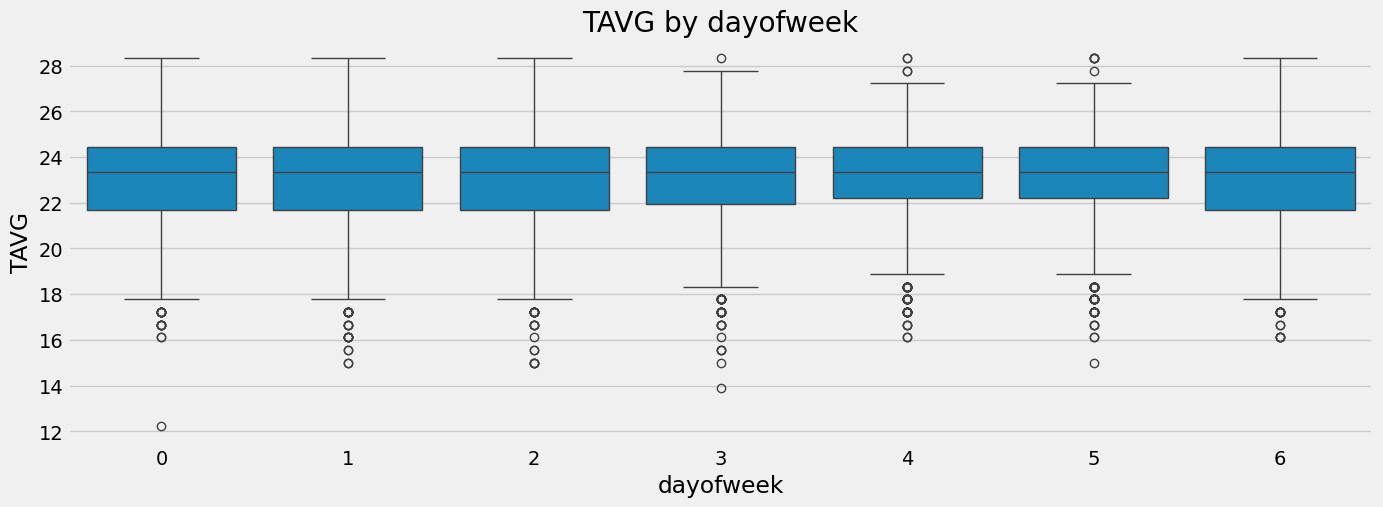

In [21]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(data = weather1, x = "dayofweek", y = "TAVG")
ax.set_title("TAVG by dayofweek")

Text(0.5, 1.0, 'TAVG by quarter')

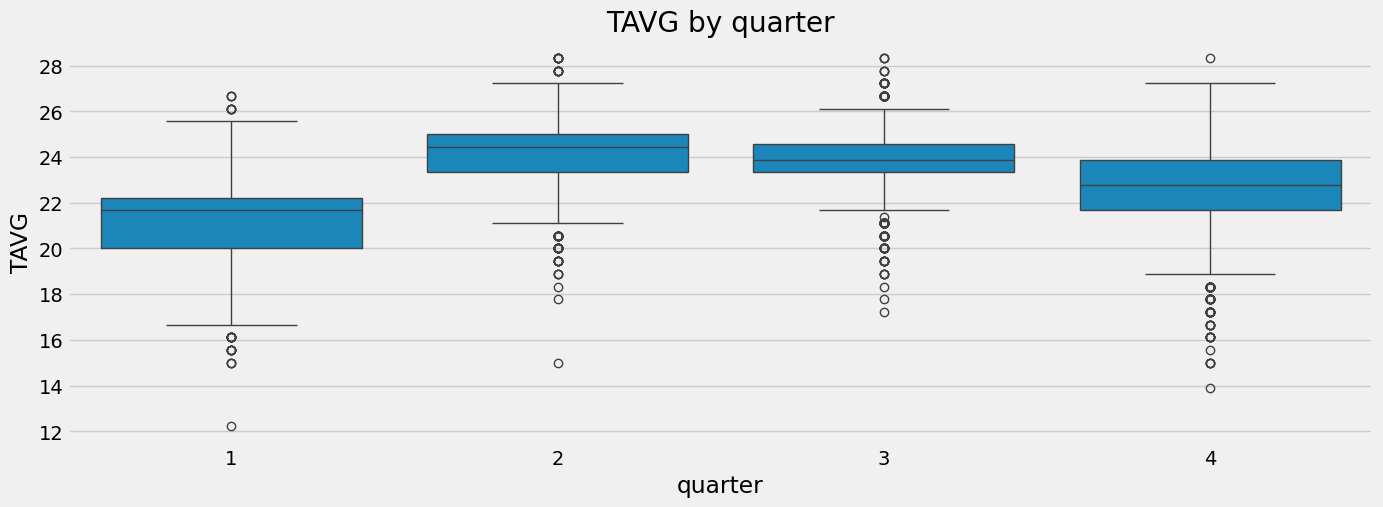

In [22]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(data = weather1, x = "quarter", y = "TAVG")
ax.set_title("TAVG by quarter")

Text(0.5, 1.0, 'TAVG by month')

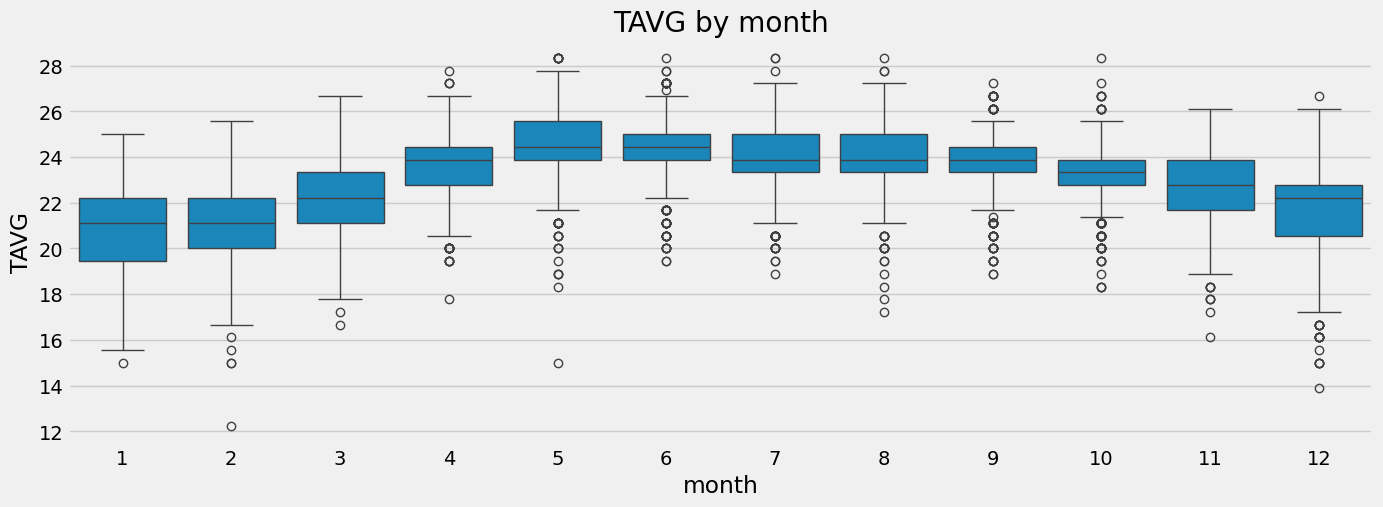

In [23]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(data = weather1, x = "month", y = "TAVG")
ax.set_title("TAVG by month")

<ipython-input-24-d31ab08ad35f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


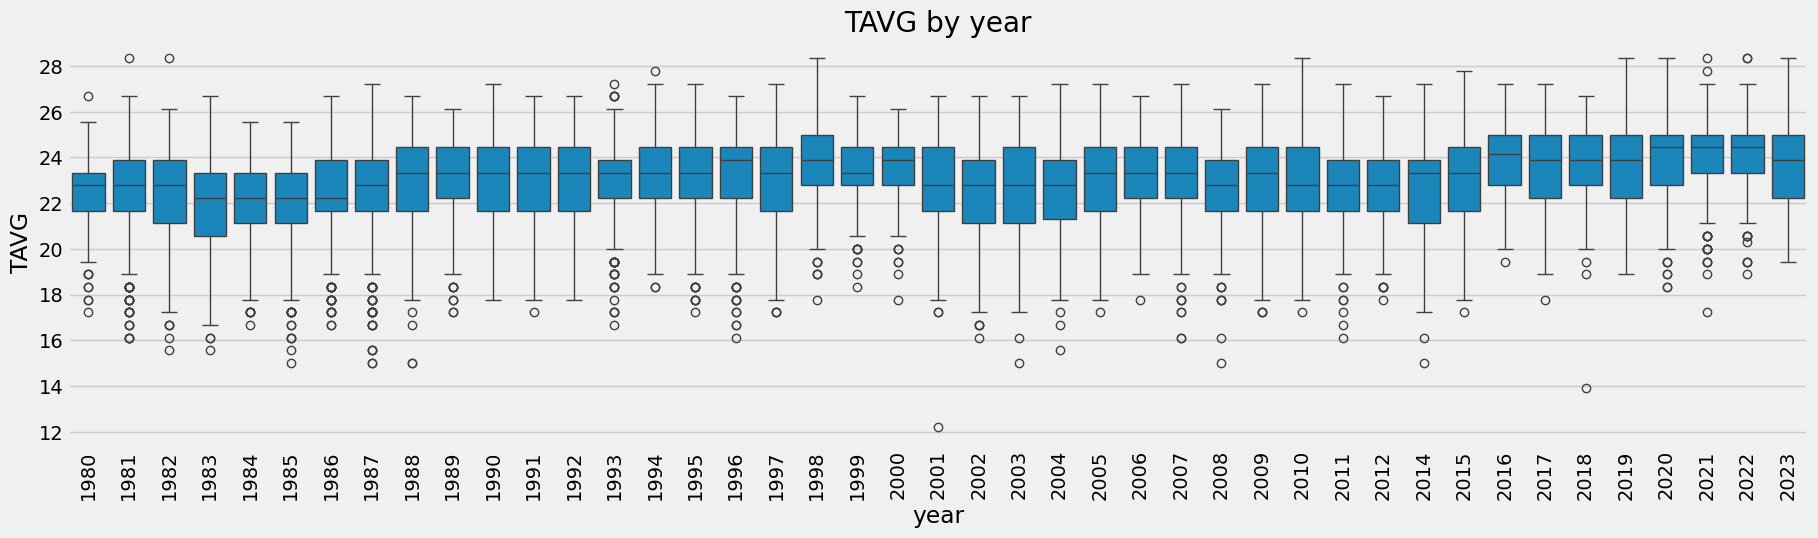

In [24]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "year", y = "TAVG")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("TAVG by year")

plt.show()

<ipython-input-25-37345fb2be32>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


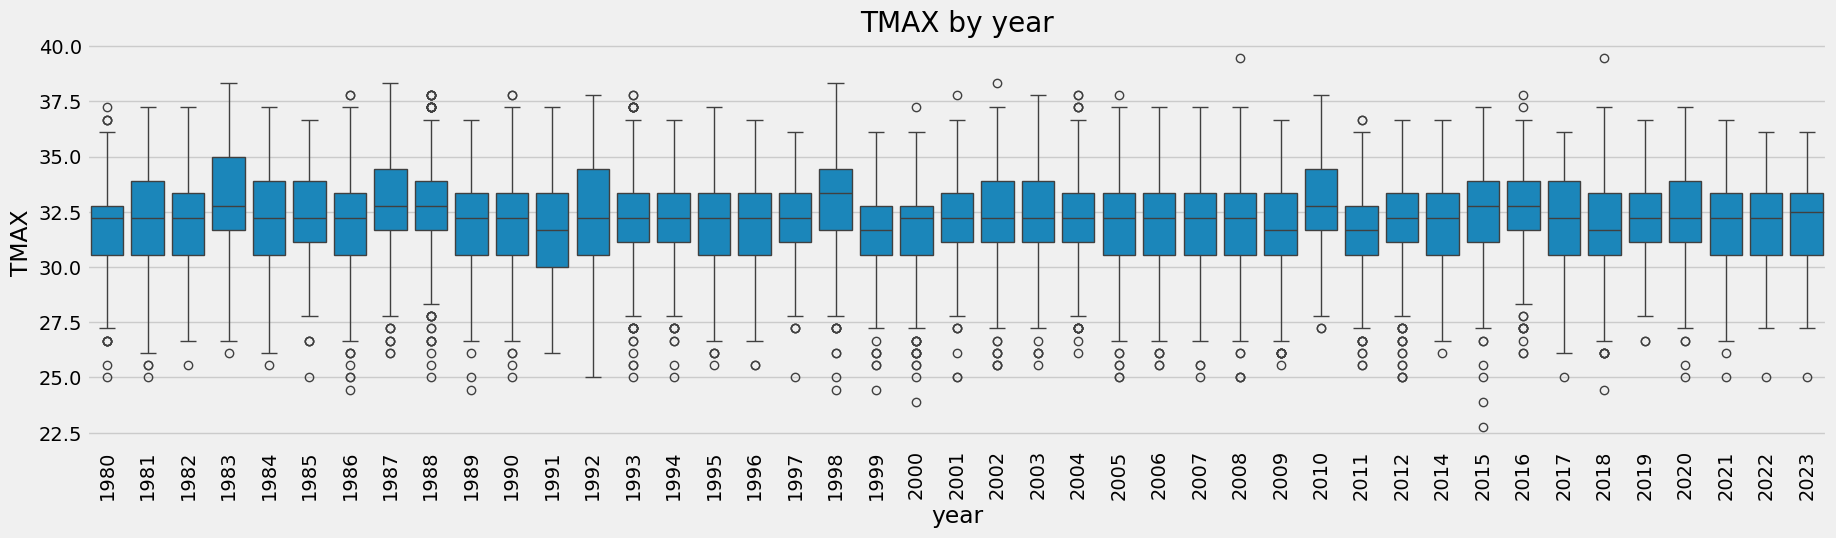

In [25]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "year", y = "TMAX")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("TMAX by year")

plt.show()

<ipython-input-26-99d3823f68da>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


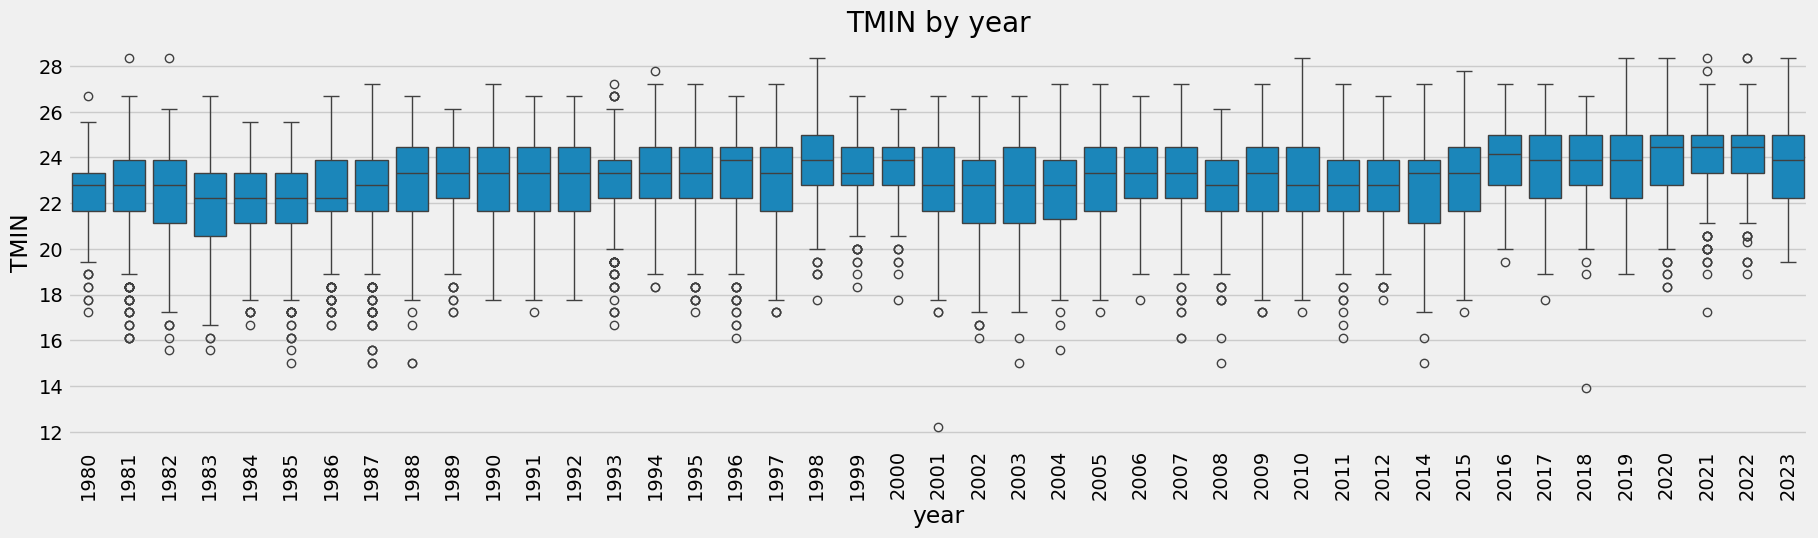

In [26]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "year", y = "TMIN")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("TMIN by year")

plt.show()

<ipython-input-27-9a61b689f6c3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


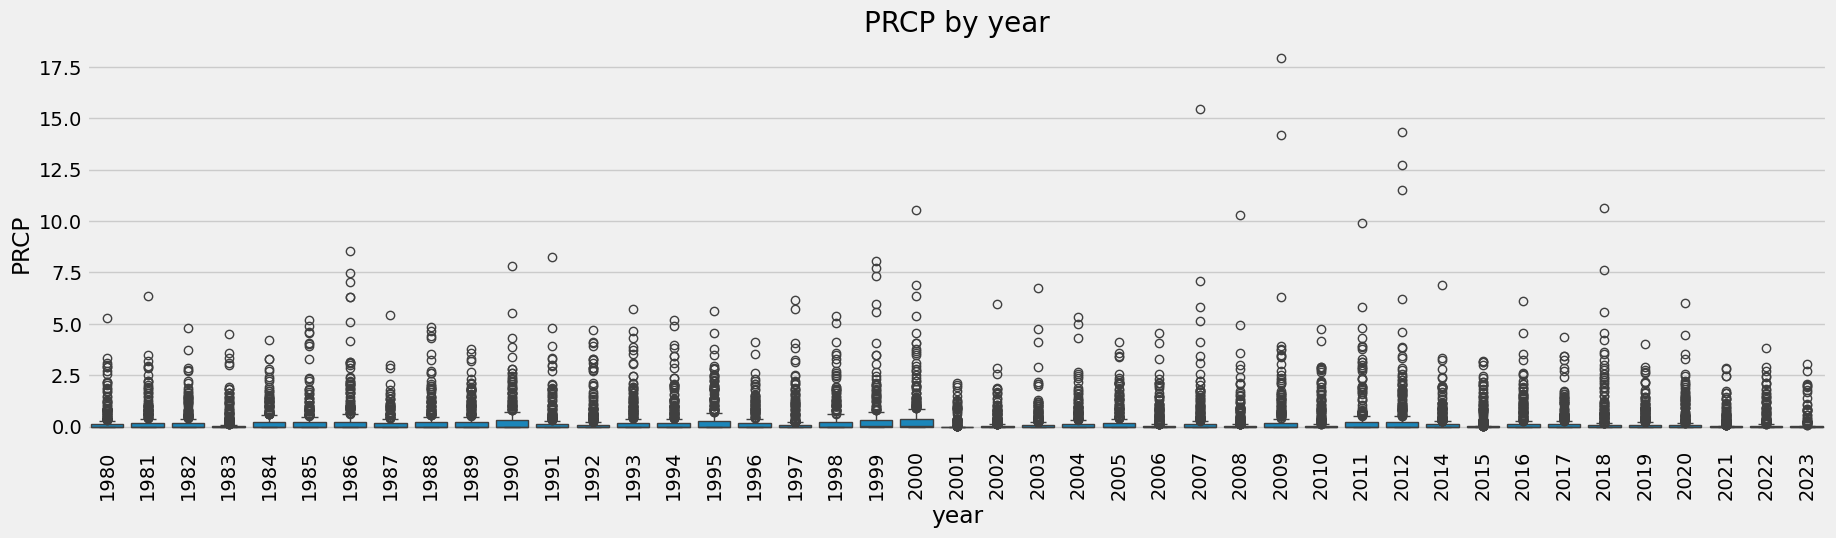

In [27]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "year", y = "PRCP")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("PRCP by year")

plt.show()

<ipython-input-28-fe0d2cc33c1a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


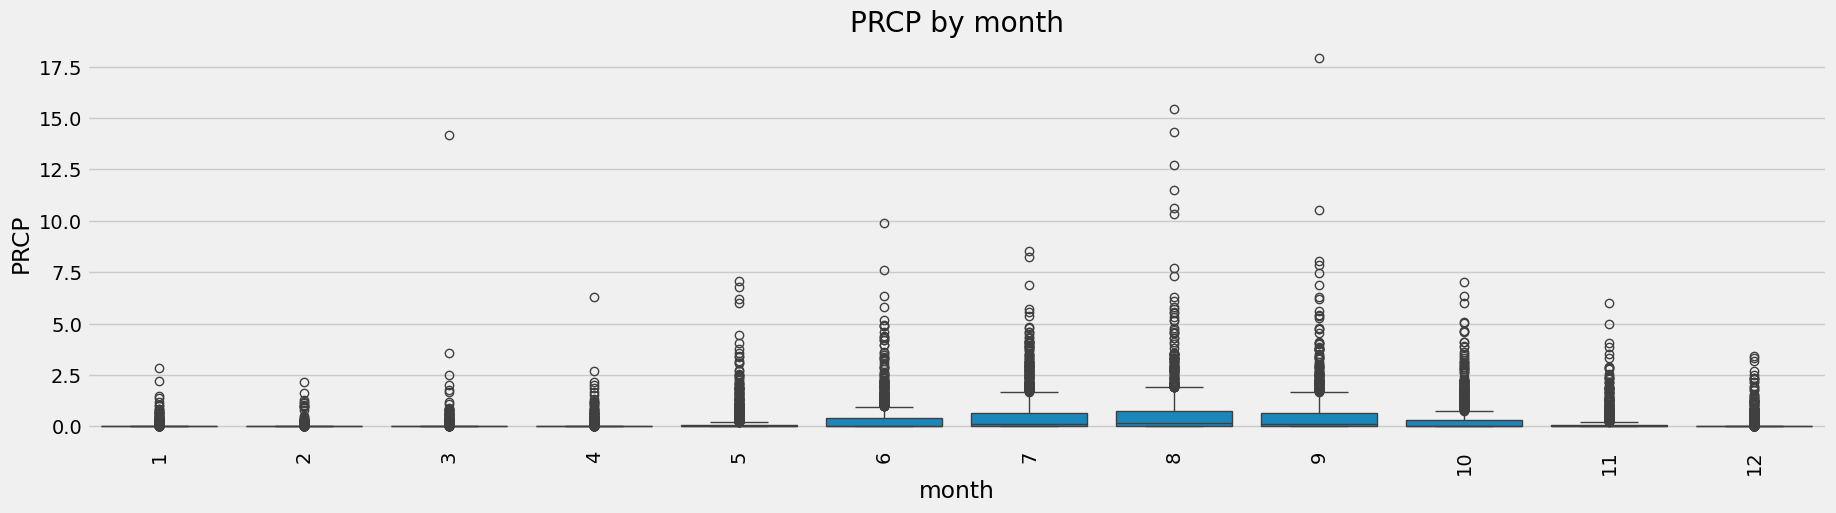

In [28]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "month", y = "PRCP")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("PRCP by month")

plt.show()

<ipython-input-29-93f250ae4548>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


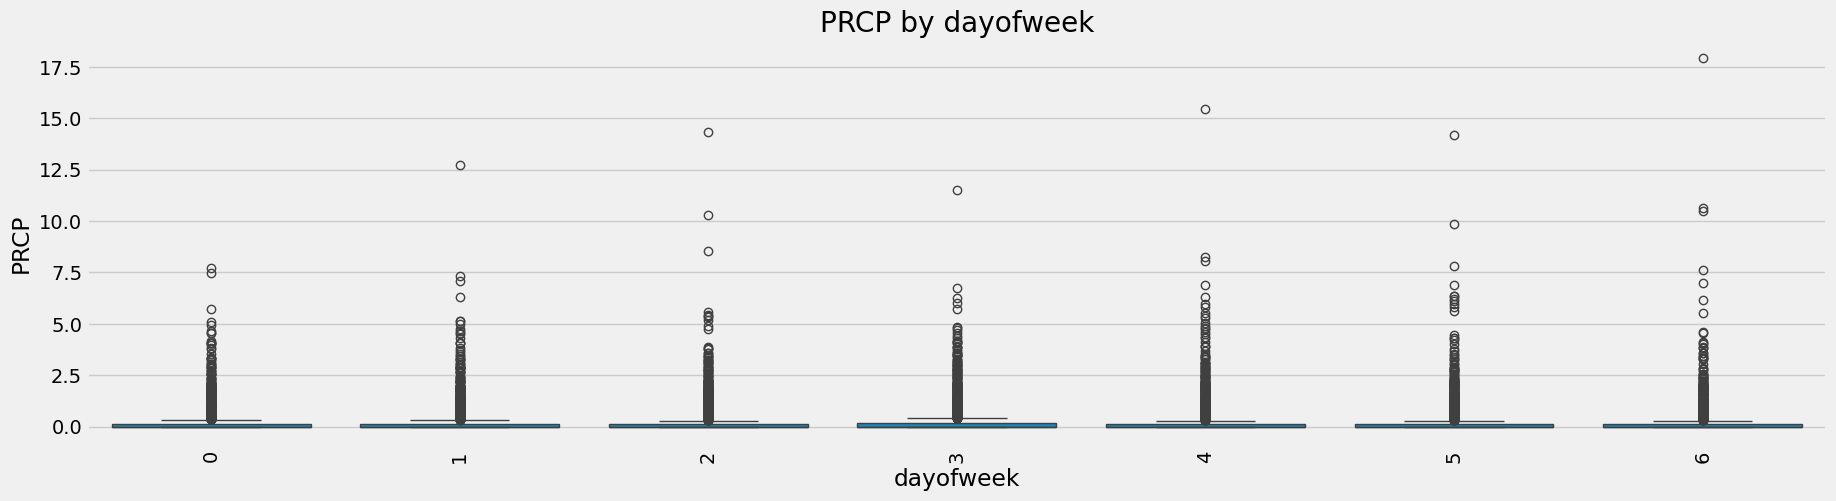

In [29]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "dayofweek", y = "PRCP")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("PRCP by dayofweek")

plt.show()

<ipython-input-30-431d67fa85c7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


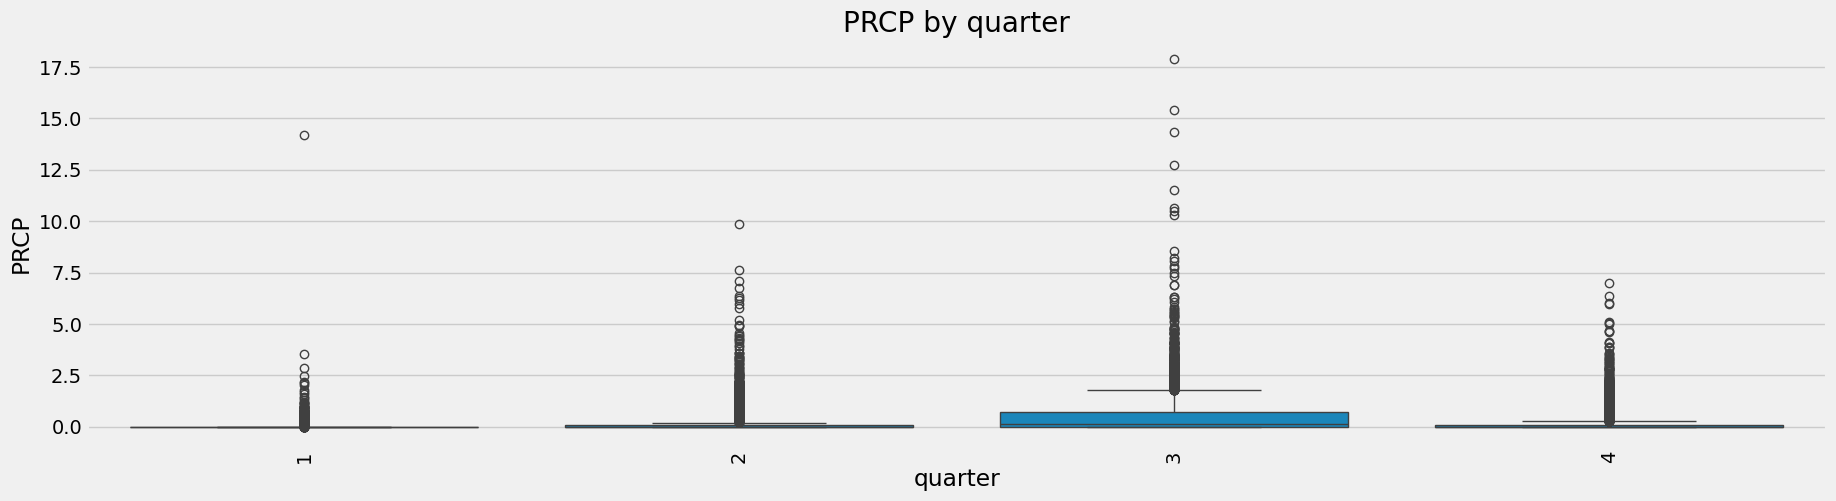

In [30]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = weather1, x = "quarter", y = "PRCP")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title("PRCP by quarter")

plt.show()

In [31]:
weather1

,PRCP,TAVG,TMAX,TMIN,dayofweek,quarter,month,year,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
1980-01-01,0.0,20.000000,30.555556,20.000000,1,1,1,1980,20.000000,20.000000
1980-01-02,0.0,19.444444,30.555556,19.444444,2,1,1,1980,19.722222,19.444444
1980-01-03,0.0,21.666667,27.777778,21.666667,3,1,1,1980,20.370370,21.666667
1980-01-04,0.0,20.000000,30.000000,20.000000,4,1,1,1980,20.277778,20.000000
1980-01-05,0.0,18.333333,30.555556,18.333333,5,1,1,1980,19.888889,18.333333
...,...,...,...,...,...,...,...,...,...,...
2023-07-10,0.0,25.000000,33.888889,25.000000,0,3,7,2023,23.909881,24.063307
2023-07-11,0.0,25.000000,33.888889,25.000000,1,3,7,2023,23.910713,23.843669
2023-07-12,0.0,23.333333,33.333333,23.333333,2,3,7,2023,23.910273,24.102067


### Split the data

In [32]:
train = weather1.loc[:"2012-12-31"]

In [33]:
test = weather1.loc["2014-01-01":]

In [34]:
weather1.columns

Index(['PRCP', 'TAVG', 'TMAX', 'TMIN', 'dayofweek', 'quarter', 'month', 'year',
       'monthly_avg', 'day_of_year_avg'],
      dtype='object')

In [35]:
features = ['TAVG', 'TMAX', 'TMIN', 'dayofweek', 'quarter', 'month', 'year',
       'monthly_avg', 'day_of_year_avg']

target = ["PRCP"]

In [36]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


## XGB MODEL

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [38]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.80118	validation_1-rmse:0.66849


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:10:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:0.68644	validation_1-rmse:0.56969
[200]	validation_0-rmse:0.65333	validation_1-rmse:0.55587
[243]	validation_0-rmse:0.64668	validation_1-rmse:0.55754


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<ipython-input-39-d18372b20c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


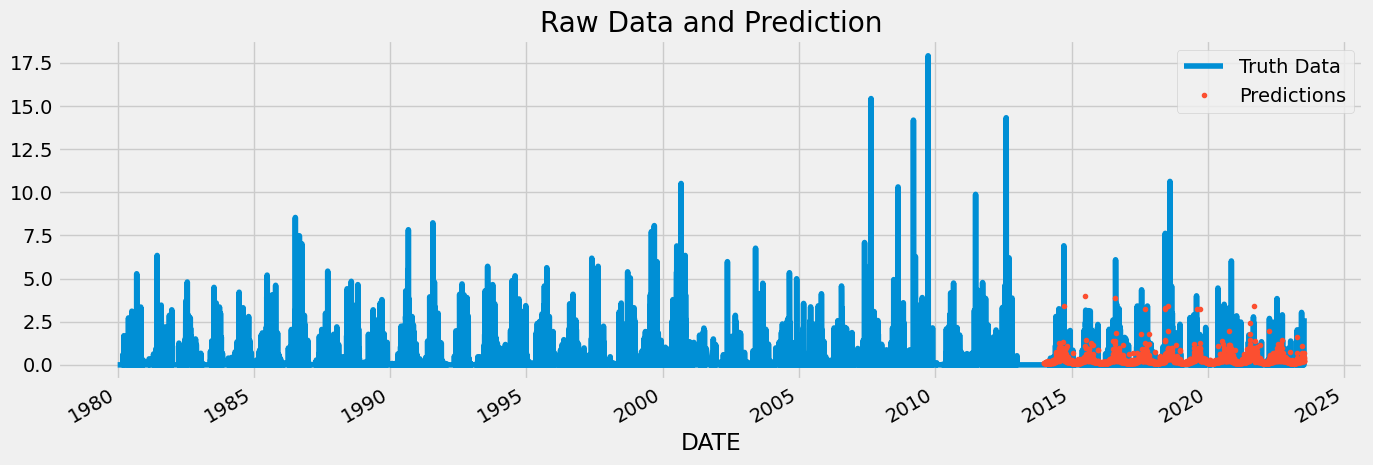

In [39]:
test['prediction'] = reg.predict(X_test)


weather1 = weather1.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = weather1[['PRCP']].plot(figsize=(15, 5))
weather1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()


In [40]:
score = np.sqrt(mean_squared_error(test['PRCP'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 0.56


In [41]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ["importance"])

<Axes: title={'center': 'Feature Importance'}>

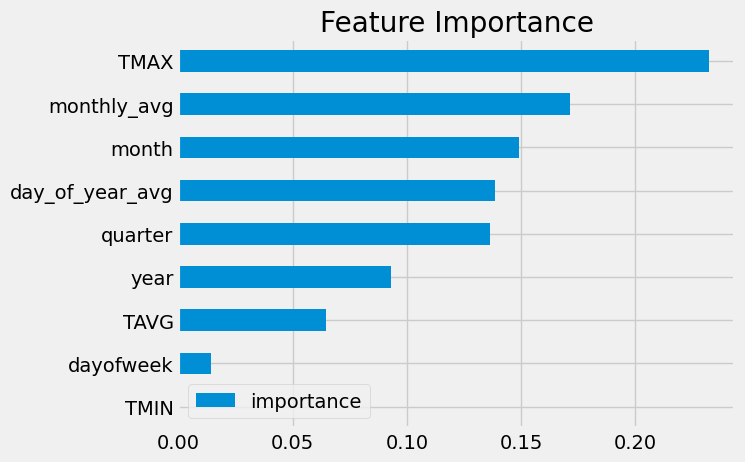

In [42]:
fi.sort_values('importance').plot(kind='barh', title = 'Feature Importance')